# Cnet

UNet-like deep neural network

## Workflow

* fetch data
* prepare data
* data augmentation
* select model
* select hyperparameters
* train model weights
* validate testset


## Fetch Data

Dataset is downloaded from the Kaggle competition: [Ultrasound Nerve Segmentation](https://www.kaggle.com/c/ultrasound-nerve-segmentation)

With given [script](scripts/ultrasound-nerve-segmentation.py) data is prepared for [protoseg](https://github.com/chriamue/protoseg) framework.


registered backend: ptsemseg_backend
registered backend: gluoncv_backend
Using backend:  gluoncv_backend
registered backend: Cnet_backend
Using backend:  Cnet_backend


Using TensorFlow backend.


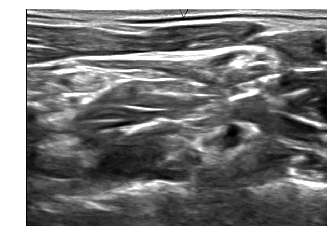

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import yaml
import cv2
from matplotlib import pyplot as plt

from protoseg import Augmentation
from protoseg import Config
from protoseg import DataLoader
from protoseg import Model
from protoseg import Trainer
from protoseg import backends

import Cnet
import Cnet.Filters

backends.register_backend('Cnet_backend', 'Cnet.Cnet_backend.Cnet_backend')
backends.set_backend('Cnet_backend')
backend=backends.backend()

train_img = cv2.imread("data/train/1_1.tif")

plt.axis('off')
plt.imshow(train_img, cmap='gray')
plt.show()

In [2]:
import yaml
configs = Config('./configs/config.yml')
run = configs.keys[0]
config = configs.get()
print('Run: ', run)
resultpath = os.path.join("results/", run)

Run:  Cnet


## Prepare Data

- Cnet.Filters.sharpen: []



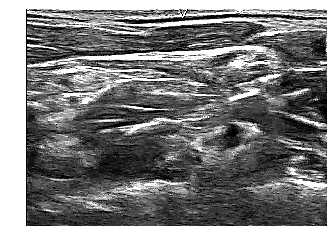

In [3]:
print(yaml.dump(config['filters']))
sharp_img = Cnet.Filters.sharpen(train_img)

plt.axis('off')
plt.imshow(sharp_img)
plt.show()

## Augmentation

Configuration for image augmentation is available.

'shape_augmentation' changes images and masks.

In [4]:
print(yaml.dump(config['shape_augmentation']))
augmentation = Augmentation(config=config)

- Multiply:
    mul: [0.75, 1.25]
- Multiply:
    mul: [0.75, 1.25]
- Affine: {rotate: -15}
- Affine: {rotate: 15}
- Affine:
    scale: [0.9, 3.0]
- Fliplr: {p: 1.0}



## Dataloader

In [5]:
config["datapath"] = "data/"
print('datapath:', config['datapath'])
print('ignore_unlabeled', config['ignore_unlabeled'])
print('____________')
dataloader = DataLoader(config=config, mode='train', augmentation=augmentation)

  0%|          | 0/5635 [00:00<?, ?it/s]

datapath: data/
ignore_unlabeled True
____________


100%|██████████| 5635/5635 [00:05<00:00, 1013.58it/s]

___ loading filters ___
Cnet.Filters sharpen []


Dataloader for validation.

In [6]:
valdataloader = DataLoader(config=config, mode='val')

100%|██████████| 21/21 [00:00<00:00, 1015.21it/s]

___ loading filters ___
Cnet.Filters sharpen []


## Model
Select [model](Cnet/Cnet.py)

In [7]:
modelfile = os.path.join('results/', run, 'model.checkpoint')
model = Model(config, modelfile)

/home/chriamue/workspace/Cnet/Cnet/Cnet.py:57: UserWarning: Update your `Cnet` call to the Keras 2 API: `Cnet(outputs=Tensor("co..., inputs=Tensor("in...)`
  super(Cnet, self).__init__(inputs=inputs, output=self.out)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 4640        conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 256, 256, 32) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
batch_norm

loaded model from: results/Cnet/model.checkpoint


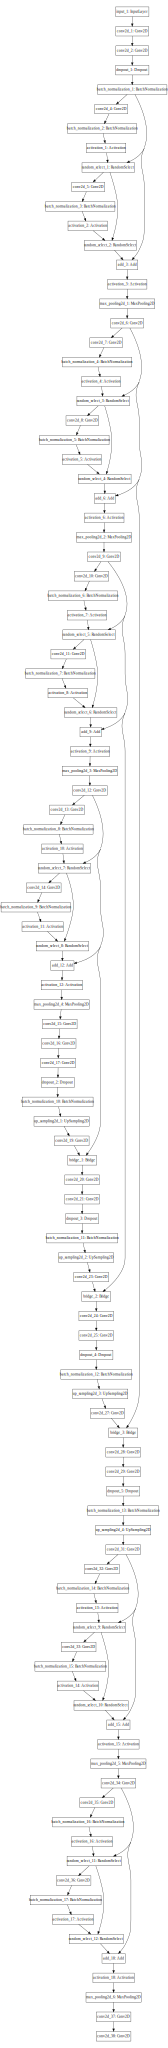

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model.model).create(prog='dot', format='svg'))

In [ ]:
from protoseg import backends
config["epochs"]=1
config["batch_size"]=1
config["summary_steps"]=25
summarywriter = backend.get_summary_writer(logdir=resultpath)
trainer = Trainer(config, model, dataloader, valdataloader=valdataloader, summarywriter=summarywriter)
trainer.train()

___ loading metrices ___
dice protoseg.metrices.dice dice
jaccard protoseg.metrices.jaccard jaccard
iou protoseg.metrices.iou iou
___ loading postprocessors ___
protoseg.postprocessors.threshold threshold [0.2]
Cnet.Postprocessors scalemax []
protoseg.postprocessors.round round []
Cnet.Postprocessors remove_small [100]
Epochs: 1
Learning rate: 0.05
Batch size: 1
starting epoch: 0
train on gluoncv backend
Epoch 1/1
